In [4]:
import matplotlib.pyplot as plt
from matplotlib import animation

In [5]:
# @Jason from https://stackoverflow.com/questions/32663758/split-line-into-multiple-line 
def split_line(start, end, segments):
    x_delta = (end[0] - start[0]) / float(segments)
    y_delta = (end[1] - start[1]) / float(segments)
    points = []
    for i in range(1, segments):
        points.append([start[0] + i * x_delta, start[1] + i * y_delta])
    return [start] + points + [end]

# Starting Point

<IPython.core.display.Javascript object>


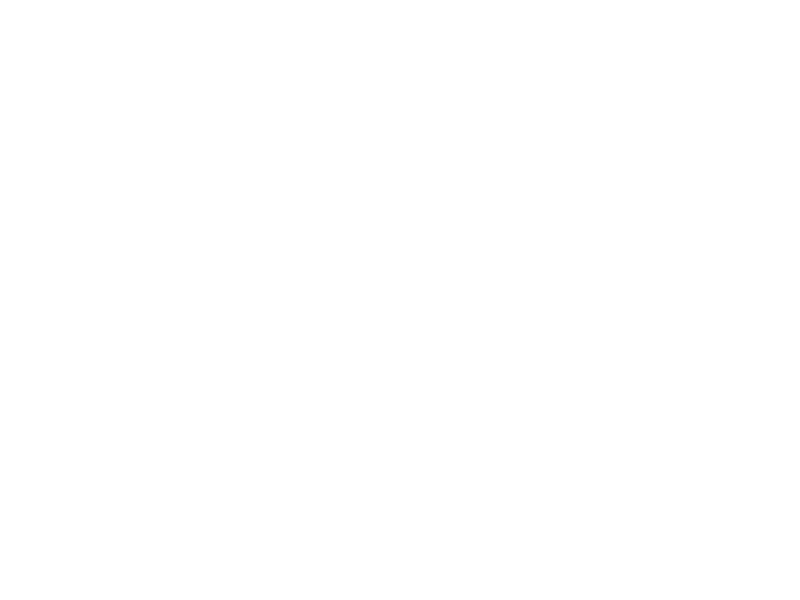

In [6]:
%matplotlib notebook

# Setup Plot
fig, ax1 = plt.subplots()


start = [0,0]
end = [10,10]
fpl = 50 # frames per line
fps = 50 # frames per second
spf = 1000 / fps # (milli)seconds per frame

segments = split_line(start, end, fpl)
line, = ax1.plot([], [], color='k')

def animate_init():
    ax1.set_xlim(0,end[0])
    ax1.set_ylim(0,end[1])
    return line,

def animate_update(frame):
    x = [p[0] for p in segments[:frame]]
    y = [p[1] for p in segments[:frame]]
    line.set_data(x, y)
    return line,
    
ani = animation.FuncAnimation(
    fig, 
    animate_update,
    interval=spf,
    frames=len(segments) + 1,
    init_func=animate_init, 
    #blit=True,
    repeat=True
    )

#ani.save('test2.gif')
plt.show()

# Timeline

<IPython.core.display.Javascript object>


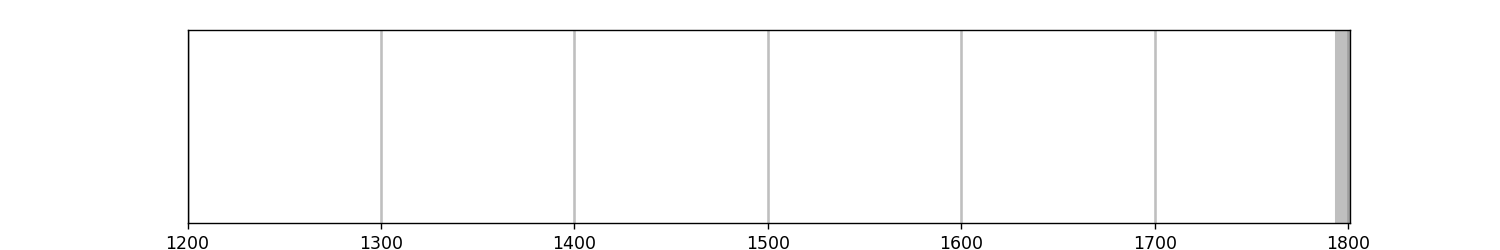

In [31]:
%matplotlib notebook

min_date = 1200
max_date = 1800
tick_step = 100
frame_step = 100
xticks = range(min_date, max_date + 1, tick_step)
date_frames = range(min_date, max_date + 1, frame_step)
# Keys are frames

animate_dict = {}
for i in range(0,len(date_frames)):
    animate_dict[i] = date_frames[i]

total_frames = len(animate_dict)
fps = 6 # frames per second
spf = 1000 / fps # (milli)seconds per frame
    
# Setup Plot
fig, ax1 = plt.subplots(figsize=(12,2))
ax1.set_xticks(xticks)
ax1.set_xlim(min_date, max_date + 1)
ax1.set_yticks([])
[ax1.axvline(x, color="grey", alpha=0.5) for x in xticks]

#line, = ax1.plot([], [], color='k')
anim_line = ax1.axvline(x=0, alpha=0.5, color='grey', lw=15)
anim_line.set_data([1000,1000],[0,1])

def animate_update(frame):
    x = animate_dict[frame]
    anim_line.set_data([x, x],[0,1])
    return line

ani = animation.FuncAnimation(
    fig, 
    animate_update,
    interval=spf,
    frames=len(animate_dict), 
    blit=True,
    repeat=True
    )


ani.save('timeline.gif', writer="imagemagick")
#plt.show()

In [20]:
## Gridspec

<IPython.core.display.Javascript object>


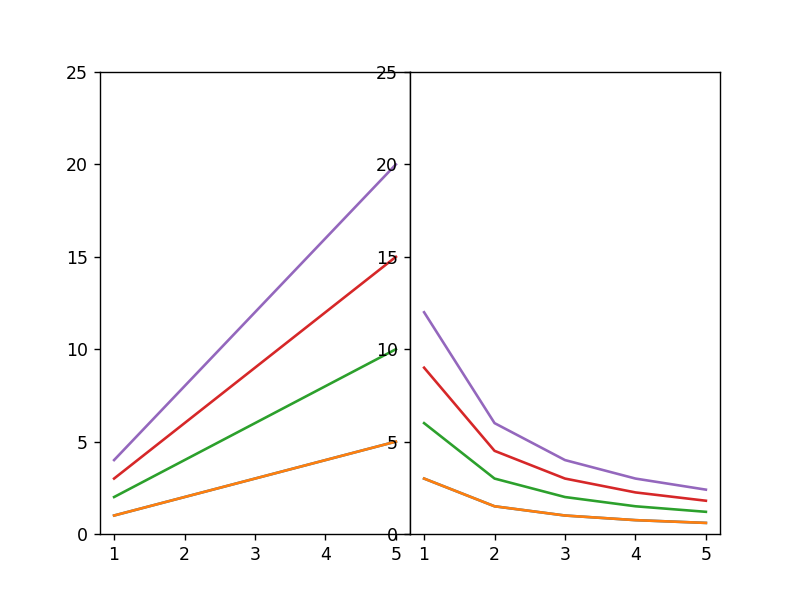

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from matplotlib.gridspec import GridSpec

data = np.array([1,2,3,4,5])
seti = np.array([1,2,3,4])


gs1 = GridSpec(1,2, wspace=0, hspace=0)
figure = plt.figure()
ax1 = plt.subplot(gs1[0,0])
ax2 = plt.subplot(gs1[0,1], sharey = ax1)
ax1.set_ylim(0,25)

def animate_update(i):
    x = data
    y = i*x
    ax1.plot(x,y)

    a = data
    b = 3.*i/x
    ax2.plot(a,b)

ani = anim.FuncAnimation(figure, animate_update, frames = seti, 
                         interval =500, repeat = False)

plt.show()